In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

import torch
import torch_geometric.data

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/synthesisproject/anaconda3/envs/zeo_diffusion/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open(f'ZeoSynGen_dataset.pkl', 'rb') as f: # load scaler
    dataset = pickle.load(f)

In [3]:
dataset.get_system('MTW', scaled=False, return_dataframe=True)

[           Si        Al    P   Ge    B   Na    K   OH         F       H2O  \
 0    0.062500  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.031250  0.875000   
 1    0.111111  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.055556  0.777778   
 2    0.062500  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.031250  0.875000   
 3    0.062500  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.031250  0.875000   
 4    0.062500  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.031250  0.875000   
 ..        ...       ...  ...  ...  ...  ...  ...  ...       ...       ...   
 596  0.059701  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.029851  0.895522   
 597  0.059701  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.029851  0.895522   
 598  0.985915  0.014085  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
 599  0.996678  0.003322  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
 600  0.985915  0.014085  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000   
 
          sda1  cryst_temp  cryst_time  
 0    0.031250       

MFI
n_syn: 2247
n_osda: 168
      Si/Al      Al/P  Si/Ge   Si/B  Na/T  K/T  OH/T   F/T  H2O/T  sda1/T  \
0     400.0  0.000000   99.0  250.0   0.0  0.0   0.0  0.50    4.0    0.50   
1     400.0  0.000000   99.0  250.0   0.0  0.0   0.0  0.50    4.0    0.50   
2     400.0  0.000000   99.0  250.0   0.0  0.0   0.0  0.50    7.0    0.50   
3     400.0  0.000000   99.0  250.0   0.0  0.0   0.0  0.50    4.0    0.50   
4     400.0  0.000000   99.0  250.0   0.0  0.0   0.0  0.04   20.0    0.08   
...     ...       ...    ...    ...   ...  ...   ...   ...    ...     ...   
2242   70.0  1.717997   99.0  250.0   0.0  0.0   0.0  0.00    0.0    0.00   
2243   40.0  1.717997   99.0  250.0   0.0  0.0   0.0  0.00    0.0    0.00   
2244   40.0  1.717997   99.0  250.0   0.0  0.0   0.0  0.00    0.0    0.00   
2245   40.0  1.717997   99.0  250.0   0.0  0.0   0.0  0.00    0.0    0.00   
2246   70.0  1.717997   99.0  250.0   0.0  0.0   0.0  0.00    0.0    0.00   

      cryst_temp  cryst_time  
0          140.0

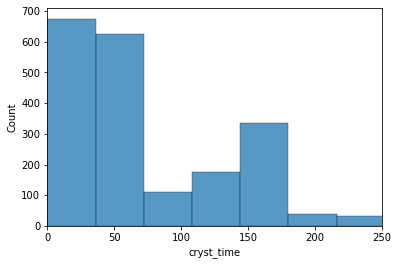

In [6]:
for zeo, c in pd.DataFrame(dataset.y_zeo1_code, columns=['code']).value_counts().items():
    zeo = zeo[0]
    if zeo != 'Dense/Amorphous':
        print(zeo)
        sys_infos = dataset.get_system(zeo, scaled=False, return_dataframe=True)

        x_syn_ratio = sys_infos[1]
        unique_osdas = set(sys_infos[13])

        print('n_syn:', c)
        print('n_osda:', len(unique_osdas))
        print(x_syn_ratio)

        plt.figure()
        sns.histplot(x_syn_ratio['cryst_time'], bins = 100)
        plt.xlim(0,250)
        print()
        break

In [15]:
dataset.get_datapoints_by_index([16711], scaled=True, return_dataframe=True)

[         Si        Al         P   Ge    B   Na    K   OH    F       H2O  \
 0  0.013924  0.025316  0.025316  0.0  0.0  0.0  0.0  0.0  0.0  0.911392   
 
        sda1  cryst_temp  cryst_time  
 0  0.024051       210.0        48.0  ,
      Si/Al      Al/P  Si/Ge  Si/B  Na/T  K/T  OH/T  F/T     H2O/T   sda1/T  \
 0  0.22767  0.484985    1.0   1.0   0.0  0.0   0.0  0.0  0.436017  0.63964   
 
    cryst_temp  cryst_time  
 0    0.985485    0.283784  ,
 ['pseudoboehmite, H3PO4, fumed silica'],
 ['CHA'],
 [Data(x=[132, 2], edge_index=[2, 1464], edge_vec=[1464, 3], code='CHA')],
    zeo_num_atoms     zeo_a     zeo_b     zeo_c  zeo_alpha  zeo_beta  \
 0       -0.14822  0.247695  0.296209  0.394198   0.623268  0.585498   
 
    zeo_gamma  zeo_volume  zeo_largest_free_sphere  zeo_largest_free_sphere_a  \
 0   1.086546   -0.099851                -0.061437                   0.405664   
 
    ...  zeo_ovlpvfract  zeo_deriv_mean  zeo_deriv_variance  \
 0  ...         0.31472       -0.090342         